In [1]:
# Graph Theory easy exercises for Social Networks module
# LACC 2021
import numpy as np
import math
import random
import matplotlib.pyplot as plt  # For plotting graphs

In [2]:
# giving access to your google drive folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls "/content/drive/My Drive/Colab Notebooks"
%cd "/content/drive/My Drive/Colab Notebooks"

from Graph_util import graph_gen, cluster_graph, plot_graph,plot_path, plot_cycle,check_cycles

Mounted at /content/drive
Connect.py
data
Graph_util.py
LACC2021_graph_theory_day1_Exc_old.ipynb
LACC2021_graph_thoery_day1_Exc.ipynb
LACC2021_graph_thoery_day1_sol.ipynb
LACC2021_graph_thoery_day1_sol_old.ipynb
LACC2021_graph_thoery_day1_sol_test.ipynb
__pycache__
/content/drive/My Drive/Colab Notebooks


**Exercise : Load Matrix**

In [3]:
#*************************************
# This is where you write your code
#
# matrix_load()
#
# Loads an adjacency matrix for a graph from a file
#
# input: filename
# output: matrix containing each node 
# 
# Notes: 
#   1. You can open a file using 'with open(filename) as f:'
# 
#   2. You can get a list containing each line with f.readlines()
#
# Hints:
#   1. To remove the annoying '\n', check out the function 'strip()'
#
#   2. How do you turn a string into a list of characters?
#       e.g. '00100' to [ '0', '0', '1', '0', '0' ]
#
#   3. How do you turn a list of characters into a list of integers?
#       e.g. [ '0', '0', '1', '0', '0' ] to [ 0, 0, 1, 0, 0 ]
#
#   4. Check out 'append()' to make 2D lists
#
#*************************************
def matrix_load(filename):
    
    mat = []

    with open( filename ) as f:
        data = f.readlines()

    for row in data:
        mat.append( [int(c) for c in row.strip()] )

    return mat

**Test**

In [4]:
# Variables
filename = 'data/matrix0.txt'
np.random.seed(0)

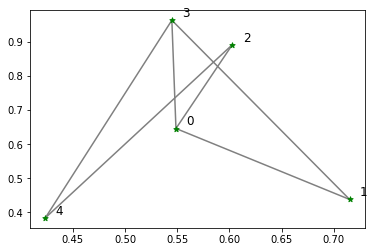

In [5]:
# Load adj. matrix 
mat = matrix_load(filename)

# Create x, y coordinates for ease of plots
N = len(mat)
x_coords = np.random.uniform(0,1,N)
y_coords = np.random.uniform(0,1,N)
plot_graph(x_coords, y_coords, mat)

**Exercise : Print Degrees**

In [6]:
#*************************************
# This is where you write your code
#
# print_degrees(mat)
#
# Prints the degrees of all nodes in a graph given an adj. matrix 
#
# Input:  the adjacency matrix of the graph
# Output: none
# 
# Print format:
#   Degree of Node x : y
#
# Note: 
#   1. You don't need to return anything. 
#
#   2. Effectively, you'll need to count the number of 1s in each row (or col)
#
#
# Hints:
#   1. Remember how to use for loops with range. What should be the range?
#
#   2. Check out the in-built function 'sum()'
#
#   3. Check out 'format()' or the '%' symbol for fancy printing
#
#*************************************

def print_degrees(mat):

    for i in range(len(mat)):
        print( 'Degree of Node %d: %d' % (i, sum(mat[i])) )

**Test**

In [7]:
#print degrees
print_degrees(mat)

Degree of Node 0: 3
Degree of Node 1: 2
Degree of Node 2: 2
Degree of Node 3: 3
Degree of Node 4: 2


**Exercise : Shortest Path**

In [8]:
#*************************************
# This is where you write your code
#
# shortest_path(mat,node1,node2)
#
# Find the shortest path from node1 to node2 in a graph given an adj. matrix 
#
# Input:  the adjacency matrix of the graph,node1,node2
# Output: 'The path is: ' appended with all edges on the path if there is one, otherwise print out 'No such path'
#
#
# Note: 
#   1. Also return a list containing all the nodes on the path.
#      If no path exists, return an empty list
#
#   2. Remember to print the path from node1 to node2
#
#   3. If verbose = True, prints output
#
# Hints:
#   1. No idea how to start? Check out the intuitive animation on wiki:
#       https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Algorithm
#       https://en.wikipedia.org/wiki/Breadth-first_search#Pseudocode
#
#   2. Already know this? Are there any other ways to do this? 
#      Is it recursive or iterative? Can you modify it into the other?
#
#*************************************

def shortest_path(mat, node1, node2, verbose=True):

    path = []
    N = len(mat)

    mat = np.array(mat)     # Change to numpy array for its functions

    queue   = [ node1 ]     # Use a list for the queue
    parents = [ -2 ] * N    # Initialize all node's parents to be -2

    parents[node1] = -1     # Use -1 to symbolize the root node

    foundPath = False

    while len(queue) != 0 and foundPath == False:

        current_node = queue.pop(0)
        neighbors = np.nonzero( mat[current_node] )[0]
        
        for n in neighbors:
            if parents[n] == -2:   # If n's parent is -1, then it has not been traversed
                queue.append(n)
                parents[n] = current_node
    
            if n == node2:         # If n is node2, we found the path
                foundPath = True
                current_node = node2
                while current_node != node1:
                    parent = parents[current_node]
                    path.append( (parent, current_node) )
                    current_node = parent

                path.reverse()          # Reverse the path 
                break

    if verbose:
        if foundPath:                   # Backtrack the path if found
            print('The path is: ')
            for edge in path:
                print( edge )

        else:
            print('No such path')

    return path

**Test**

The path is: 
(0, 2)
(2, 4)


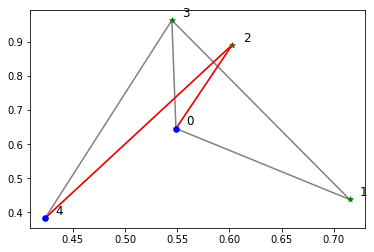

In [9]:
# Plot graph and find shortest path from root to dest (in red)
node1 = 0
node2 = 4

plot_graph(x_coords, y_coords, mat)
path = shortest_path(mat,node1,node2)
plot_path(x_coords, y_coords, path)

**Exercise : Detect Cycles**

In [10]:
#*************************************
# This is where you write your code
#
# detect_cycle(mat)
#
# Detect the cycle in a graph given an adj. matrix 
#
# Input:  the adjacency matrix of the graph
# Output: 'Found a cycle consisting of the following edges: ' appended with the edges on the cycle, otherwise print out 'No cycle in the graph'
# 
# Note: 
#   1. Also return a list containing all the nodes on the cycle.
#      If no cycle exists, return an empty list
#
#   2. If vebose = True, prints output
#
# Hints:
#   1. In this exercise, it is assumed that the graphs are connected
#
#
#   2. Recursive? Iterative? Try out both
#*************************************

def detect_cycle(mat, verbose=True):

    root = 0        # Graphs are connected: Use arbitrary starting node
    cycle = []

    N = len(mat)
    visited = [0]*N
    parents = [-2]*N

    
    stack = [ (root, -1) ]

    while len(stack) != 0 and len(cycle) == 0:

        node,parent = stack.pop()
        visited[node] = 1
        parents[node] = parents

        for n in np.nonzero( mat[node] )[0]:

            if visited[n] == 0:
                stack.append( (n,node) )

            elif parent != n:
                mat[n][node] = mat[node][n] = 0
                cycle.append( (node,n) )
                cycle.extend( shortest_path( mat, node, n, verbose=False ) )
                mat[n][node] = mat[node][n] = 1

                break

    if verbose:
        if len(cycle) == 0:
            print('No cycle in the graph')

        else:
            print('Found a cycle consisting of the following edges:')
            for edge in cycle:
                print(edge)

    return cycle

In [11]:
def detect_cycle_recursive(mat, verbose=True):

    root = 0        # Graphs are connected: Use arbitrary starting node
    cycle = []

    N = len(mat)
    visited = [0] * N

    back_edge = dfs(mat, root, visited, -1)

    if len(back_edge) != 0:

        n1, n2 = back_edge

        mat[n1][n2] = mat[n2][n1] = 0
        cycle.append( back_edge )
        cycle.extend( shortest_path(mat, n1, n2, verbose=False) )
        mat[n1][n2] = mat[n2][n1] = 1

    if verbose:
        if len(back_edge) == 0:
            print('No cycle in the graph')

        else:
            print('Found a cycle consisting of the following edges:')
            for edge in cycle:
                print(edge)

    return cycle

def dfs(mat, node, visited, parent):

    back_edge = []
    visited[node] = 1

    for n in np.nonzero(mat[node])[0]:
        if visited[n] == 0:
            back_edge = dfs(mat, n, visited, node)
         
        elif parent != n:
            back_edge = (n, node)


    return back_edge

**Test**

Found a cycle consisting of the following edges:
(2, 0)
(2, 4)
(4, 3)
(3, 0)


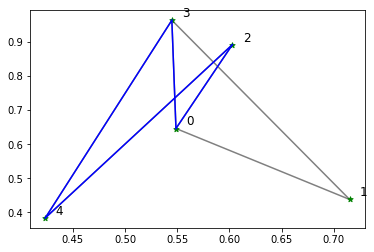

In [12]:
# Plot graph and find if cycles exist
cycle = detect_cycle(mat)
#cycle = detect_cycle_recursive(mat)

plot_graph(x_coords, y_coords, mat)
plot_cycle(x_coords, y_coords, cycle)

**Extra Exercise: Connectedness**

In [13]:
# get_component(n,mat)
#   Gets the component that includes the node 
#
#   Inputs:  node node
#   Outputs: The list of nodes in the component
def get_component(node,mat):

    N = len(mat)
    components = set([node])
    preList = set( np.nonzero(mat[node])[0] )
    components.update(preList)

    while True:
        curList = set()
        for p in preList:
            neighbors = np.nonzero(mat[p])[0]

            for n in neighbors:
                if n not in components:
                    components.add(n)
                    curList.add(n)

        if len(curList) == 0:
            break 
        else:
            preList = curList

    return list(components)

In [14]:
# is_connected(mat)
#   returns 1 if the graph is connected, 0 otherwise.
#
#   Inputs:  adjacency matrix mat
#   Outputs: True/False

def is_connected(mat):

    component = get_component(0,mat)
    return len(component) == len(mat)

In [15]:
# find_components(mat):
#   Finds all connected components in a graph
#   prints one component per line
#   If verbose = True, prints output
#   
#   Inputs:  adjacency matrix: mat
#   Outputs: the list of connected components: conncomp

def find_components(mat, verbose=True):
    
    N = len(mat)
    nodes = [i for i in range(N)]

    components = []

    while len(nodes) != 0:
        root = nodes[0]
        component = get_component(root, mat)
        components.append( component )
        nodes = [ n for n in nodes if n not in component ]

    if verbose:
        for idx, component in enumerate(components):
            print( 'Component #%d:' % (idx) )
            print( '[%s]\n' % (','.join(map(str,sorted(component)))) )

    return components

**Test**

In [16]:
# Variables
N = 100
p = 0.9
d = 0.12
seed = 1000

# Generate a random graph
x_coords, y_coords, mat = graph_gen(N, p, d, seed)

# Check if it is connected
is_connected(mat)

False

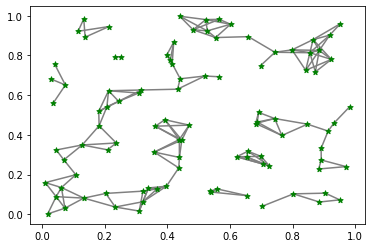

In [17]:
# Draw the graph
plot_graph(x_coords, y_coords, mat, annotate=False)

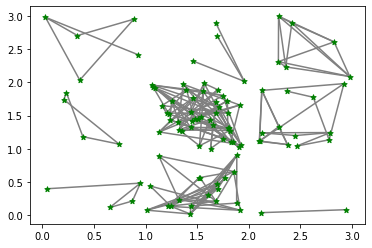

In [18]:
# Cluster the graphs to see each component better
x_coords, y_coords, mat = cluster_graph(mat,seed)

**Extra Exercise: Detect Cycles in graph containing multiple components**


In [19]:
# detecting cycles in a graph containing multiple components

#*************************************
# detect_cycle_gen(mat)
#
# Detects if cycle exists in each component of a disconnected graph
# Input:  adj. matrix
# Output: a 2D list 'components', and a 2D list 'cycles'
#
# Notes:
#   1. The i-th item in 'components' should list all nodes within that connected component
#
#   2. The i-th item in 'cycles' should list a cycle within the i-th component ([] if no cycles)
#
# Hints:
#   1. Is it necessary to entirely rewrite this function? Can some previous functions be re-used?
#
#   2. Find the connected components first, then find cycles in each component
#
#*************************************
def detect_cycle_gen(mat, verbose=True):
    
    components = find_components(mat, verbose=False)
    cycles = []

    for component in components:
        
        cycle = detect_component_cycle(mat, component)
        cycles.append(cycle)

        if verbose:
            print('The component consisting of the nodes:\n[%s]' % ','.join(map(str,sorted(component))))
            if len(cycle) == 0:
                print('has no cycle\n')
            else:
                print('has a cycle consisting of the nodes:\n[%s]\n' % ','.join(map(str,cycle)))
    

    return components, cycles 

def detect_component_cycle(mat, component):

    cycle = []
    root = component[0]        # Components are connected: Use arbitrary starting node

    N = len(mat)
    visited = [0]*N
    parents = [-2]*N

    stack = [ (root, -1) ]

    while len(stack) != 0 and len(cycle) == 0:

        node,parent = stack.pop()
        visited[node] = 1
        parents[node] = parents

        for n in np.nonzero( mat[node] )[0]:

            if n not in component:
                continue

            if visited[n] == 0:
                stack.append( (n,node) )

            elif parent != n:
                mat[n][node] = mat[node][n] = 0
                cycle.append( (node,n) )
                cycle.extend( shortest_path( mat, node, n, verbose=False ) )
                mat[n][node] = mat[node][n] = 1

                break

    return cycle    

**Test**

Congratulations! All cycles are correct


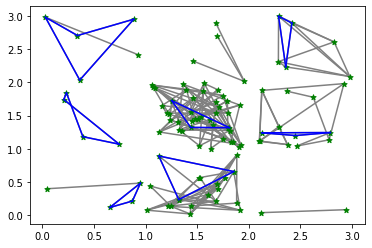

In [21]:
# Find if cycles exist in each component
components, cycles = detect_cycle_gen(mat, verbose=False)
check_cycles(mat, cycles)

x_coords, y_coords, mat = cluster_graph(mat,seed)
for cycle in cycles:
    plot_cycle(x_coords, y_coords, cycle)

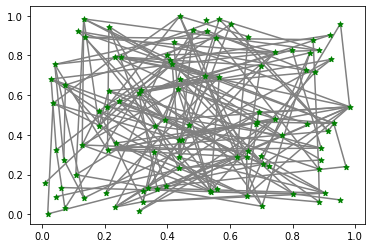

In [22]:
# Variables
N = 100
p = 0.05
d = 0.8
seed = 1000
# Generate a random graph
x_coords, y_coords, mat = graph_gen(N, p, d, seed)
plot_graph(x_coords, y_coords, mat, annotate=False)

The path is: 
(5, 13)
(13, 34)
(34, 38)
(38, 67)


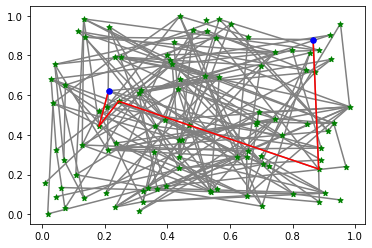

In [23]:
node1 = 5
node2 = 67

plot_graph(x_coords, y_coords, mat, annotate=False)
path = shortest_path(mat,node1,node2)
plot_path(x_coords, y_coords, path)

Found a cycle consisting of the following edges:
(92, 93)
(92, 95)
(95, 93)


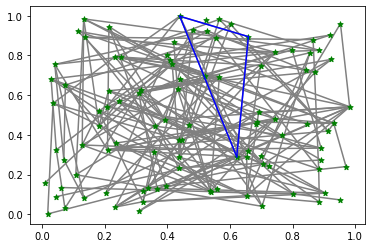

In [24]:
# Plot graph and find if cycles exist
cycle = detect_cycle(mat)
#cycle = detect_cycle_recursive(mat)

plot_graph(x_coords, y_coords, mat, annotate=False)
plot_cycle(x_coords, y_coords, cycle)